<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />


# Exploratory Data Analysis I Project Work on Carsales

## Table of Contents

1. [Problem Statement](#section1)<br/>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [How many Cars sales based on Drive?](#section401)<br/>
    - 4.2 [What is the Carsales rate considering the car variable?](#section402)<br/>
    - 4.3 [What is the rate of Car Sales on the base of  body?](#section403)<br/>
    - 4.4 [How mileage rate vary with cars?](#section404)<br/>
    - 4.5 [Car sales rate comparing with year?](#section405)<br/>
    - 4.6 [Analysing Engine type with year?](#section406)<br/>
    - 4.7 [How many  registered cars?](#section407)<br/>
    - 4.8 [Car Sales based on Price Variable?](#section408)<br/>
    
    
    
5. [Conclusions](#section5)<br/>  

<a id=section1></a>
### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 


<a id=section2></a>
### 2. Data Loading and Description


- The dataset consists of the information about Car Sales. Various variables present in the dataset includes data of Price, Car, boby, Model etc. 
- The dataset comprises of __891 observations of 10 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Car   | Car company                                        | 
| Price      | Price of the car                         |  
| body        | body of the car                                           | 
| Mileage         | Car mileage                                         |   
| Engv           | Engine Version                                          |
| Eng Type           | Engine type                                         |
| Registration         | Registration avilable or not |
| Year         | Year of purched|
| Model        | Model of the car                                             |
| Drive          | Drive Type                                           |


#### Importing packages     

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mt
import bokeh
import pandas_profiling
%matplotlib inline
sns.set()

from subprocess import check_output
import matplotlib.pyplot as plt

#### Importing the Dataset

In [3]:
carsales = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv',encoding='latin-1')



<a id=section3></a>
## 3. Data Profiling

- In the sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>
### 3.1 Understanding the Dataset

In [3]:
carsales.shape

(9576, 10)

In [26]:
carsales.columns


Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [24]:
carsales.head(15)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.000,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.000,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.000,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.000,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.000,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.000,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.000,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.000,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.000,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.000,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [6]:
carsales.tail()

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [16]:
carsales.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [10]:
carsales.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [17]:
carsales.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

From the above output we can see that __EngV__ and __Drive__ columns contains __maximum null values__. We will see how to deal with them.

<a id=section302></a>
### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [ ]:
profile = pandas_profiling.ProfileReport(carsales)
profile.to_file(outputfile="car_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __Carsales_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section303></a>
### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Replacing missing entries of __EngV__with median values.
    - Replacing missing values of __Drive__ with median values.
    - Replacing 0 values of fare with median values.

In [13]:
carsales.drive = carsales.drive.fillna(carsales['drive'].mode()[0])

In [14]:
carsales.engV = carsales.engV.fillna(carsales['engV'].mode()[0])


In [15]:
median_mileage = carsales.mileage.median()
carsales.mileage.fillna(median_mileage, inplace = True)

In [16]:
median_price = carsales.price.median()
carsales.price.fillna(median_price, inplace = True)

<a id=section304></a>
## 3.4 Post Pandas Profiling

In [29]:
import pandas_profiling

In [18]:
profile = pandas_profiling.ProfileReport(carsales)
profile.to_file(outputfile="car_afterprocessing.html")

Now we have preprocessed the data, now the dataset doesnot contain missing values,the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e __car_after_preprocessing.html__ and car_preprocessing.html.<br/>
In car_afterpreprocessing.html report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__ 
- Number of __variables__ = __10__ 


<a id=section4></a>
## 4.Questions?

<a id=section401></a>
### 4.1 How many Cars sales based on Drive?

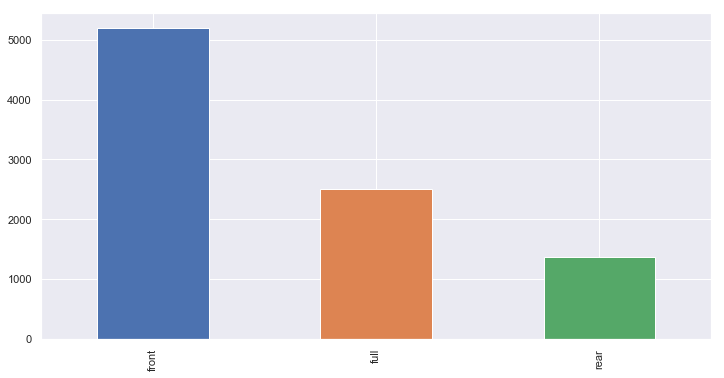

In [17]:
plt.figure(figsize=(12,6))
carsales['drive'].value_counts().head().plot.bar()
#sns.countplot(data = carsales,x = 'drive')


<a id=section402></a>
### 4.2 What is the Carsales rate considering the car variable?

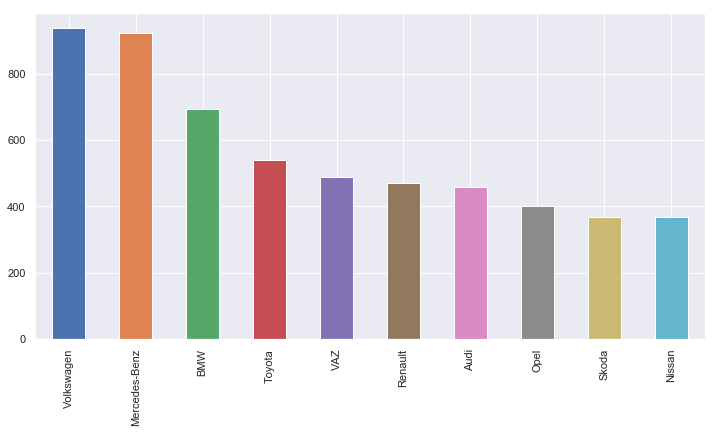

In [20]:
plt.figure(figsize=(12,6))
carsales['car'].value_counts().head(10).plot.bar()
    
    

<a id=section403></a>
### 4.3 What is the rate of Car Sales on the base of  body?

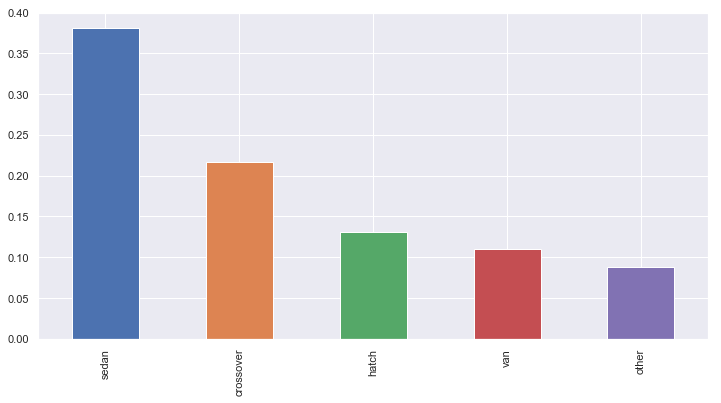

In [32]:
plt.figure(figsize=(12,6))
(carsales['body'].value_counts().head() / len(carsales)).plot.bar()

<a id=section404></a>
## 4.4 How mileage rate vary with cars?

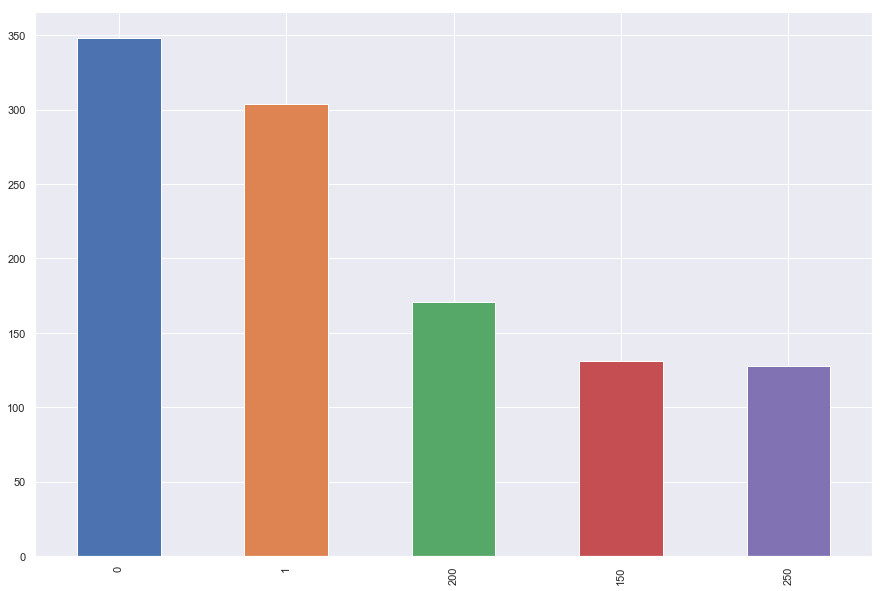

In [22]:
#carsales['mileage_group'] = pd.cut(carsales['mileage'].dropna(),
#                         [0,100,150,200,250,300,400],
#                         labels=['<100','100-150','150-200','200-300','400+'], include_lowest=True)

plt.figure(figsize=(15,10))
carsales['mileage'].value_counts().head().plot.bar()

<a id=section405></a>
## 4.5 Car sales rate comparing with year?

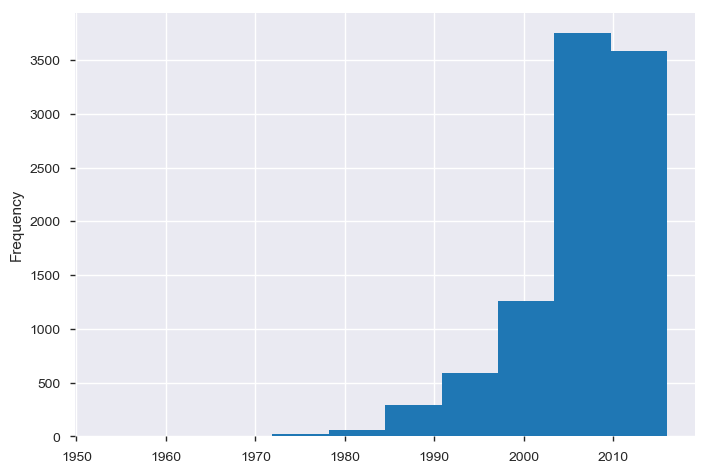

In [22]:
carsales['year'].plot.hist()

In [3]:
profile = pandas_profiling.ProfileReport(carsales)
profile.to_file(outputfile="car_preprocessing.html")

carsales.tail()

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


<a id=section406></a>

## 4.6 Analysing Engine type with year?

E:\DataScience\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


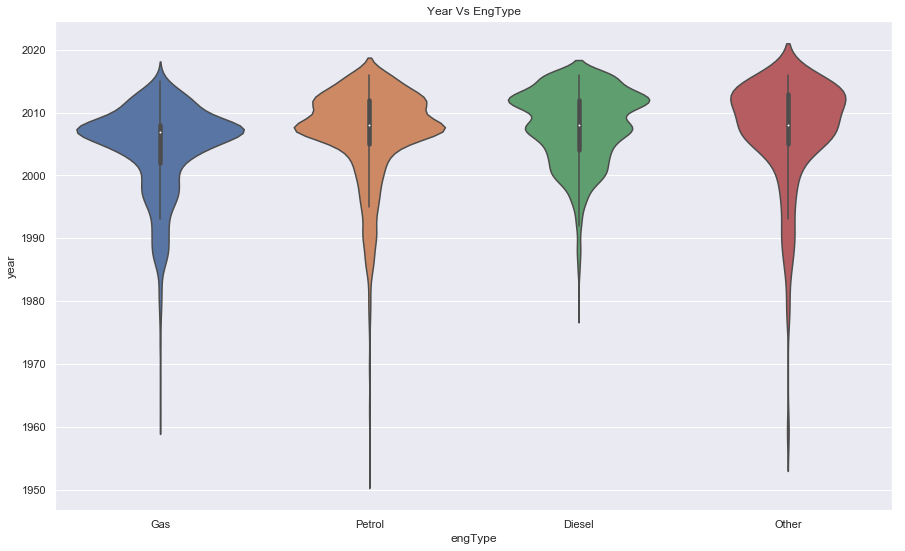

In [35]:
#sns.violinplot('year','engType', kind='point', data = carsales)
#plt.title('Year Vs EngType')
#plt.show()
plt.figure(figsize=(15,9))
sns.violinplot('engType','year', kind='point', data = carsales)
plt.title('Year Vs EngType')
plt.show()


In [ ]:
a = carsales.groupby(['car','model','drive'])['engV'].count()
b = a.reset_index()
b.head()
sns.barplot(x = 'car', y = 'model',hue = 'drive', data = b) 

In [47]:
csv_df.head()

,Outlook,Temp,Humidity,Windy,Play
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rainy,mild,high,weak,yes
4,rainy,cool,normal,weak,yes


<a id=section407></a>
### 4.7 How many  registered cars?

<Figure size 1080x720 with 0 Axes>

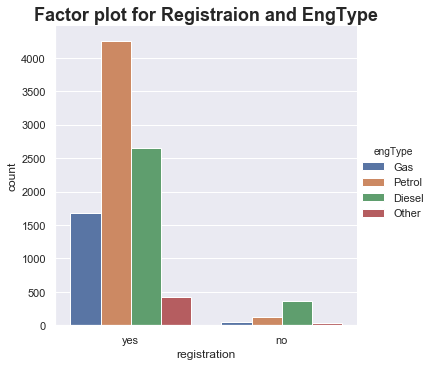

<Figure size 1080x720 with 0 Axes>

In [7]:
#sns.factorplot('registration', hue='engType', kind='count', data=carsales);
sns.catplot('registration', hue='engType', kind='count', data=carsales);
plt.title('Factor plot for Registraion and EngType',fontsize=18,fontweight="bold")
plt.figure(figsize=(15,10))
#sns.countplot(carsales['registration']);
#plt.xlabel('Factor plot for Registraion and EngType',fontsize=18,fontweight="bold");

<a id=section408></a>
### 4.8 Car Sales based on Price Variable?

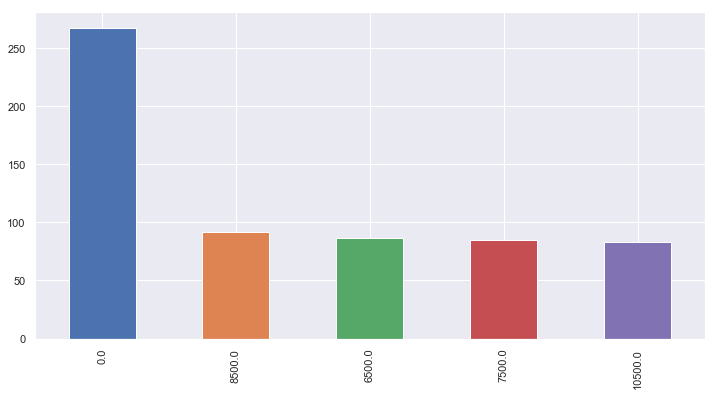

In [23]:
plt.figure(figsize=(12,6))
carsales['price'].value_counts().head().plot.bar()
#(carsales['price'].value_counts().head() / len(carsales)).plot.bar()

<a id=section5></a>
### Conclusion

- With the help of this notebook how to exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __preproceesing__ helps in dealing with _missing_ values and irregualities present in the data.
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- We have seen the impact of columns like _Car, body, year,milage,engine type 